In [1]:
from helpers import *
from constants import *
import random

In [2]:
# Enable inline plots
%matplotlib inline
pd.set_option("display.width", 70)
# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [3]:
dataset = preprocess_dataset()

In [4]:
pairs = get_pairs_count(dataset)

# ЙЦУКЕН

In [5]:
qwerty_thumbs_distance = get_thumbs_distance(
    pairs=pairs, 
    layout=QWERTY, 
    thumbs=THUMBS, 
    coords=COORDS, 
    cache_key=get_cache_key([QWERTY, THUMBS, COORDS])
)

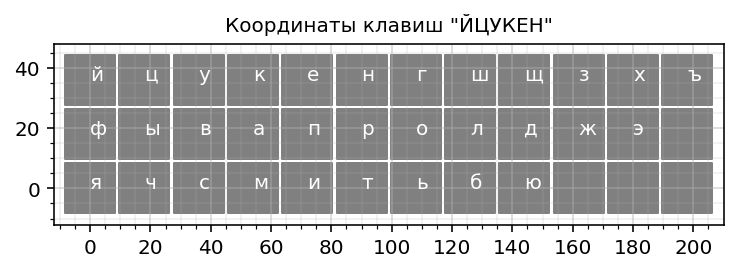

In [6]:
get_keyboard(
    coords=COORDS, 
    layout=QWERTY, 
    title='Координаты клавиш "ЙЦУКЕН"'
)

In [7]:
qwerty_distances = [
    pair_values["total_distance"]
    for thumb, thumb_values in qwerty_thumbs_distance.items()
    for pair, pair_values in thumb_values["pairs"].items()
]

In [8]:
qwerty_max = max(qwerty_distances)
qwerty_sum = sum(qwerty_distances)
qwerty_avg = qwerty_sum / len(qwerty_distances)

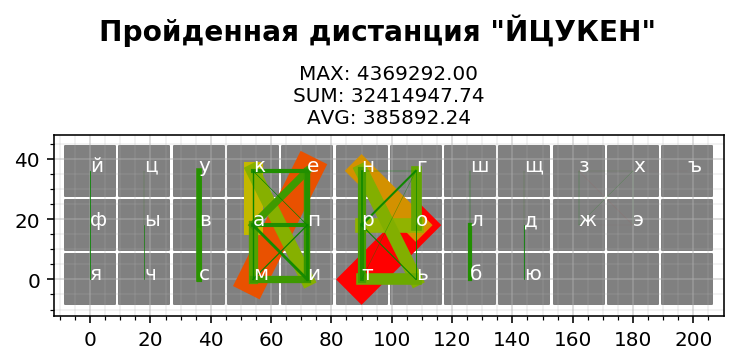

In [9]:
get_distance_map(
    thumbs_distance=qwerty_thumbs_distance, 
    max_distance=qwerty_max, 
    coords=COORDS, 
    layout=QWERTY, 
    title='Пройденная дистанция "ЙЦУКЕН"',
    subtitle=f"MAX: {qwerty_max:.2f}\n"
             f"SUM: {qwerty_sum:.2f}\n"
             f"AVG: {qwerty_avg:.2f}"
)

# Диктор

In [10]:
diktor_thumbs_distance = get_thumbs_distance(
    pairs=pairs, 
    layout=DIKTOR, 
    thumbs=THUMBS, 
    coords=COORDS, 
    cache_key=get_cache_key([DIKTOR, THUMBS, COORDS])
)

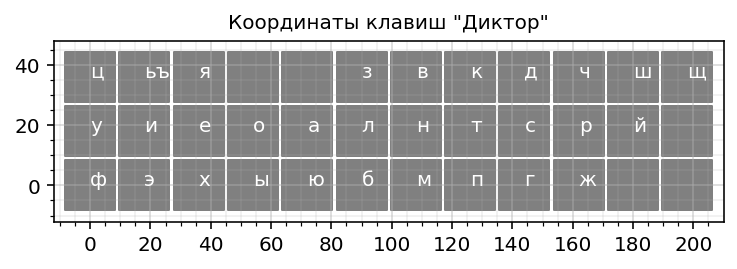

In [11]:
get_keyboard(
    coords=COORDS, 
    layout=DIKTOR, 
    title='Координаты клавиш "Диктор"'
)

In [12]:
diktor_distances = [
    pair_values["total_distance"]
    for thumb, thumb_values in diktor_thumbs_distance.items()
    for pair, pair_values in thumb_values["pairs"].items()
]

In [13]:
diktor_max = max(diktor_distances)
diktor_sum = sum(diktor_distances)
diktor_avg = diktor_sum / len(diktor_distances)
diktor_delta = layout_delta_distance(
    layout_a=QWERTY, 
    layout_b=DIKTOR, 
    thumbs=THUMBS, 
    coords=COORDS, 
    cache_key=get_cache_key([QWERTY, DIKTOR, THUMBS, COORDS])
)

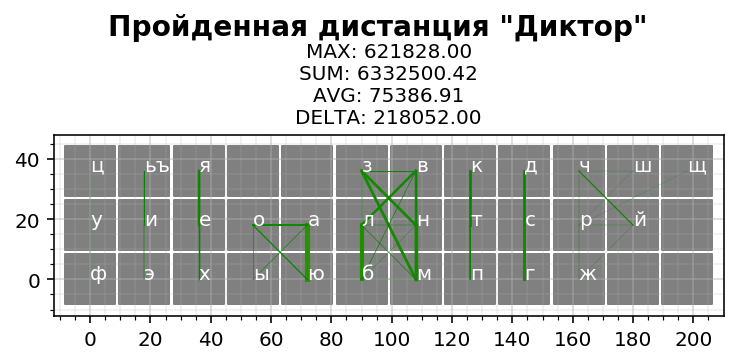

In [14]:
get_distance_map(
    thumbs_distance=diktor_thumbs_distance, 
    max_distance=qwerty_max, 
    coords=COORDS, 
    layout=DIKTOR, 
    title='Пройденная дистанция "Диктор"',
    subtitle=f"MAX: {diktor_max:.2f}\n"
             f"SUM: {diktor_sum:.2f}\n"
             f"AVG: {diktor_avg:.2f}\n"
             f"DELTA: {diktor_delta:.2f}"
)

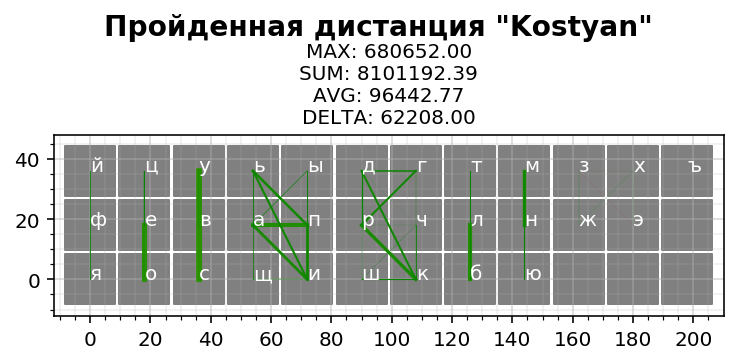

In [15]:
kostyan_thumbs_distance = get_thumbs_distance(
    pairs=pairs, 
    layout=KOSTYAN, 
    thumbs=THUMBS, 
    coords=COORDS, 
    cache_key=get_cache_key([KOSTYAN, THUMBS, COORDS])
)
kostyan_distances = [
    pair_values["total_distance"]
    for thumb, thumb_values in kostyan_thumbs_distance.items()
    for pair, pair_values in thumb_values["pairs"].items()
]
kostyan_max = max(kostyan_distances)
kostyan_sum = sum(kostyan_distances)
kostyan_avg = kostyan_sum / len(kostyan_distances)
kostyan_delta = layout_delta_distance(
    layout_a=QWERTY, 
    layout_b=KOSTYAN, 
    thumbs=THUMBS, 
    coords=COORDS, 
    cache_key=get_cache_key([QWERTY, KOSTYAN, THUMBS, COORDS])
)
get_distance_map(
    thumbs_distance=kostyan_thumbs_distance, 
    max_distance=qwerty_max, 
    coords=COORDS, 
    layout=KOSTYAN, 
    title='Пройденная дистанция "Kostyan"',
    subtitle=f"MAX: {kostyan_max:.2f}\n"
             f"SUM: {kostyan_sum:.2f}\n"
             f"AVG: {kostyan_avg:.2f}\n"
             f"DELTA: {kostyan_delta:.2f}"
)

In [16]:
# test_layout = deepcopy(QWERTY)
# for i in range(12):
#     best_layout = test_layouts(get_column_layouts(test_layout, i))["layout"]
#     test_layout = deepcopy(best_layout)
# for i in range(3):
#     best_layout = test_layouts(get_left_row_layouts(test_layout, i))["layout"]
#     test_layout = deepcopy(best_layout)
# for i in range(3):    
#     best_layout = test_layouts(get_right_row_layouts(test_layout, i))["layout"]
#     test_layout = deepcopy(best_layout)


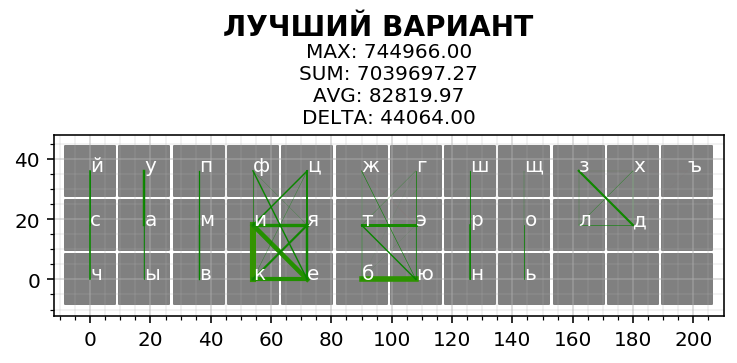

In [17]:
test_layout = deepcopy(QWERTY)
for i in range(100):
    action = random.randint(0,2)
    if action == 0:
        col = random.randint(0, 11)
        best_variant = test_layouts(get_column_layouts(test_layout, col))
        test_layout = deepcopy(best_variant["layout"])
    elif action == 1:
        row = random.randint(0, 2)
        best_variant = test_layouts(get_left_row_layouts(test_layout, row))
        test_layout = deepcopy(best_variant["layout"])
    elif action == 2:
        row = random.randint(0, 2)
        best_variant = test_layouts(get_right_row_layouts(test_layout, row))
        test_layout = deepcopy(best_variant["layout"])

get_distance_map(
    thumbs_distance=best_variant["thumbs_distance"],
    max_distance=qwerty_max,
    coords=COORDS,
    layout=best_variant["layout"],
    title=f"ЛУЧШИЙ ВАРИАНТ",
    subtitle=f"MAX: {best_variant['max']:.2f}\n"
             f"SUM: {best_variant['sum']:.2f}\n"
             f"AVG: {best_variant['avg']:.2f}\n"
             f"DELTA: {best_variant['delta']:.2f}"
)